<a href="https://colab.research.google.com/github/hafizecim/DeepLearningUygulama3/blob/main/DeepLearningUygulama3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Stil Transferi
Bu uygulamada TF Hub üzerinden stil transferi modeli kurulmuştur. Ghibli stili gibi stillerin görsellerle akktarılması uygulaması yapılmıştır

### Kütüphanelerin yüklenmesi

In [17]:
import tensorflow as tf
import tensorflow_hub as hub

In [18]:
from PIL import Image
import numpy as np

###Modelin yüklenmesi ve fonksiyonların ayarlanması

In [19]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [20]:
def load_image(img_path,max_dim):
    img = Image.open(img_path).convert('RGB')
    img.thumbnail((max_dim,max_dim))
    arr= np.array(img)/255.0
    return tf.expand_dims(arr.astype(np.float32),axis=0)

In [21]:
def stylize(content_path,style_path,content_max=512,style_max=256):
    content = load_image(content_path,content_max)
    style = load_image(style_path,style_max)
    outputs = model(tf.constant(content),tf.constant(style))
    stylized = outputs[0][0].numpy()
    stylized = (stylized*255).clip(0,255).astype(np.uint8)
    return Image.fromarray(stylized)

###Dosyaların yüklenmesi

In [ ]:
from google.colab import files
print('📸 içerik dosyasının yükleyin')
uploaded = files.upload()
content_path = list(uploaded.keys())[0]

📸 içerik dosyasının yükleyin


In [23]:
print('🎆 stil dosyasının yükleyin')
uploaded=files.upload()
style_path=list(uploaded.keys())[0]

🎆 stil dosyasının yükleyin


Saving style.jpg to style (1).jpg


### Stil tranesinin yapılması

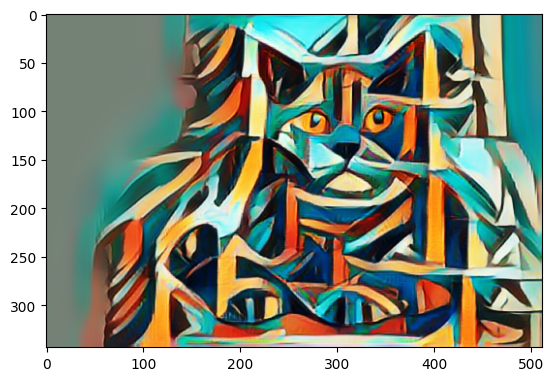

In [24]:
import matplotlib.pyplot as plt
result=stylize(content_path,style_path)
plt.imshow(result)

###Dosyayı kaydet ve indir

In [ ]:
result.save('result.jpg')
files.download('result.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>